# The Kayak project

## Step 1: get weather data for each city in the list

### Obtain GPS coordinates for each location

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
cities = ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]

In [56]:
#create a coordinates database
coord = pd.DataFrame(columns=['location','latitude', 'longitude'])

for c in cities:
    r = requests.get("https://nominatim.openstreetmap.org/search/"+c+"%20France?format=json&addressdetails=1&limit=1&polygon_svg=1")
    rson=r.json()
    lat = rson[0]['lat']
    lon = rson[0]['lon']
    d = {'location': c, 'latitude': lat, 'longitude': lon}
    coord = pd.concat([coord, pd.DataFrame(d, index=[0])], ignore_index=True)

In [57]:
coord.head()

,location,latitude,longitude
0,Mont Saint Michel,48.6359541,-1.511459954959514
1,St Malo,48.649518,-2.0260409
2,Bayeux,49.2764624,-0.7024738
3,Le Havre,49.4938975,0.1079732
4,Rouen,49.4404591,1.0939658


In [58]:
coord['latitude']=coord['latitude'].astype('float64')
coord['longitude']=coord['longitude'].astype('float64')
coord.dtypes

location      object
latitude     float64
longitude    float64
dtype: object

In [59]:
coord.index

RangeIndex(start=0, stop=35, step=1)

In [60]:
coord.to_csv(path_or_buf= 'data/coordinates.csv')

In [3]:
coord = pd.read_csv('data/coordinates.csv',index_col=[0])
coord

,location,latitude,longitude
0,Mont Saint Michel,48.635954,-1.511460
1,St Malo,48.649518,-2.026041
2,Bayeux,49.276462,-0.702474
3,Le Havre,49.493898,0.107973
4,Rouen,49.440459,1.093966
5,Paris,48.858890,2.320041
6,Amiens,49.894171,2.295695
7,Lille,50.636565,3.063528
8,Strasbourg,48.584614,7.750713
9,Chateau du Haut Koenigsbourg,48.249490,7.344296


### Get weather data for the next week for each location

In [6]:
df = pd.DataFrame(columns=['location','latitude', 'longitude', 'day', 'weather', 'pt', 'pop'])

for i in range(len(coord)): 
    r = requests.get("https://api.openweathermap.org/data/2.5/onecall?lat="+str(coord['latitude'][i])+"&lon="+str(coord['longitude'][i])+"&units=metric&exclude=current,minutely,hourly,alerts&appid=1997ad0485fe3afd24b04ac9617daa98")
    rson=r.json()
    d={}
    for n in range(7):
        loc = coord['location'][i]
        lat = coord['latitude'][i]
        lon = coord['longitude'][i]
        day = n+1
        weather =  rson['daily'][n]['weather'][0]['description']
        pt = rson['daily'][n]['feels_like']['day']
        pop = rson['daily'][n]['pop'] 
        d = {'location': loc, 
             'latitude': lat, 
             'longitude': lon,
             'day': day, 
             'weather': weather, 
             'pt':pt, 
             'pop':pop }
        df = pd.concat([df, pd.DataFrame(d, index=[0])], ignore_index=True)
 

In [16]:
df.to_csv(path_or_buf= 'data/raw_weather_data.csv')

**Once we have our weather data we can upload the corresponding csv file without going through the API again (unless we need to update our data)**

In [4]:
wd = pd.read_csv("data/raw_weather_data.csv",index_col=[0] )
wd.head()

,location,latitude,longitude,day,weather,pt,pop
0,Mont Saint Michel,48.635954,-1.51146,1,light rain,13.78,0.28
1,Mont Saint Michel,48.635954,-1.51146,2,overcast clouds,17.04,0.00
2,Mont Saint Michel,48.635954,-1.51146,3,broken clouds,19.18,0.00
3,Mont Saint Michel,48.635954,-1.51146,4,overcast clouds,19.85,0.00
4,Mont Saint Michel,48.635954,-1.51146,5,overcast clouds,15.73,0.00


In [5]:
average_pt= wd.groupby('location')['pt'].mean()
average_pt = average_pt.sort_values(axis=0, ascending=False)
average_pt.head(10)

location
Avignon            24.342857
Nimes              23.681429
Uzes               23.467143
Lyon               22.967143
Grenoble           22.525714
Carcassonne        22.415714
Montauban          22.181429
Toulouse           22.135714
Aix en Provence    21.841429
Collioure          21.790000
Name: pt, dtype: float64

In [6]:
average_pop= wd.groupby('location')['pop'].mean()
average_pop = average_pop.sort_values(axis=0, ascending=True)
average_pop.head(10)

location
Saintes Maries de la mer    0.017143
Aigues Mortes               0.028571
Nimes                       0.028571
La Rochelle                 0.042857
Uzes                        0.047143
Avignon                     0.078571
Collioure                   0.122857
St Malo                     0.144286
Carcassonne                 0.164286
Montauban                   0.175714
Name: pop, dtype: float64

In [7]:
weather_mode = wd.groupby('location')['weather'].agg(pd.Series.mode)
weather_mode[:5]

location
Aigues Mortes                          clear sky
Aix en Provence                       light rain
Amiens             [light rain, overcast clouds]
Annecy                                light rain
Ariege                                light rain
Name: weather, dtype: object

**The perceived temperature is the metric we choose to define the best locations to travel to, but we will keep the forecast as well**

In [8]:
coord_weather = coord.merge(average_pt, how='inner', on ='location')
coord_weather = coord_weather.sort_values('location')
coord_weather = coord_weather.merge(weather_mode, how='inner', on ='location')
coord_weather['weather']= coord_weather['weather'].apply(lambda x: ", ".join(x) if isinstance(x, np.ndarray) else x)
coord_weather

,location,latitude,longitude,pt,weather
0,Aigues Mortes,43.565823,4.191284,20.761429,clear sky
1,Aix en Provence,43.529842,5.447474,21.841429,light rain
2,Amiens,49.894171,2.295695,17.592857,"light rain, overcast clouds"
3,Annecy,45.899235,6.128885,20.734286,light rain
4,Ariege,42.945537,1.406554,16.182857,light rain
5,Avignon,43.949249,4.805901,24.342857,clear sky
6,Bayeux,49.276462,-0.702474,16.021429,light rain
7,Bayonne,43.493338,-1.475099,19.158571,"broken clouds, light rain"
8,Besancon,47.238022,6.024362,20.848571,light rain
9,Biarritz,43.483252,-1.559278,18.444286,"broken clouds, light rain"


In [9]:
coord_weather.to_csv(path_or_buf= 'data/average_pt.csv')

## Step 2: Scraping Bookings.com to obtain hotel data for each city

The goal now is, for each city, to obtain certain data from the hotels in the area, such as:
*   the hotel's **name**,
*   the **url** to its booking.com page,
*   its **coordinates**: latitude and longitude
*   the **score** given by the website users
*   the number of **stars** of the hotel
*   a text **description** of the hotel

In [24]:
!pip install scrapy -q
import os 
import logging
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.linkextractors import LinkExtractor
import re

In [ ]:
class MegaKayakSpider(scrapy.Spider):
    name = "kayak"
    cities =  ["Mont Saint Michel",
                "St Malo",
               "Bayeux",
               "Le Havre",
               "Rouen",
               "Paris",
               "Amiens",
               "Lille",
               "Strasbourg",
               "Chateau du Haut Koenigsbourg",
               "Colmar",
               "Eguisheim",
               "Besancon",
               "Dijon",
               "Annecy",
               "Grenoble",
               "Lyon",
               "Gorges du Verdon",
               "Bormes les Mimosas",
               "Cassis",
               "Marseille",
               "Aix en Provence",
               "Avignon",
               "Uzes",
               "Nimes",
               "Aigues Mortes",
               "Saintes Maries de la mer",
               "Collioure",
               "Carcassonne",
               "Ariege",
               "Toulouse",
               "Montauban",
               "Biarritz",
               "Bayonne",
               "La Rochelle"]
                           
    start_urls = ['https://www.booking.com/']

    def parse(self, response):
        for i in range(len(self.cities)):
            yield scrapy.FormRequest.from_response(
                response,
                formdata={'ss': self.cities[i]},
                callback=self.after_search,
                meta={'search': self.cities[i]}   
            )
            
    def after_search(self, response):
        results = response.css('div.b978843432')
        c = response.request
        location = " ".join(re.search(r'(?<=&ss=)[a-zA-Z\+]{2,30}', str(c)).group(0).split("+")) #get the name of the location
        for r in results[:]:
            hotel = {"location": location,
                     "name": r.css('div.fcab3ed991.a23c043802::text').get(),
                      "url": r.css('a.e13098a59f::attr(href)').get(),
                      "score" : r.css('div.b5cd09854e.d10a6220b4::text').get(),
                      "description" : r.css('div.d8eab2cf7f::text').get()}
            yield hotel
            
        current_url = response.request.url
        if bool(re.search("&offset=[0-9]{1,10}", current_url)):
            end = re.search(r'\d+$', current_url)
            index = int(end.group(0)) + 25
            last_page = response.css('li.f32a99c8d1 button.fc63351294.f9c5690c58::text')[-1].get()
            if index > (int(last_page)*25):
                logging.info('No next page. Terminating crawling process.') 
                
            else:
                next_page = re.sub("&offset=[0-9]{1,10}","",current_url)+"&offset="+str(index)
                yield response.follow(next_page, callback=self.after_search)
        else:
            index = 25
            next_page = current_url+"&offset="+ str(index)
            yield response.follow(next_page, callback=self.after_search)     

**Example of scraping**
![Untitled3](Untitled3.png)

**Identify the number of pages per location**

![Untitled2](Untitled2.png)

In [ ]:
filename = "hotels_.json"

if filename in os.listdir('scrp/'):
        os.remove('scrp/' + filename)

process = CrawlerProcess(settings = {
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.79 Safari/537.36',
    'LOG_LEVEL': logging.INFO,
    "FEEDS": {
        'scrp/' + filename : {"format": "json"}
    }
})

process.crawl(MegaKayakSpider)
process.start()

In [10]:
#obtain a list of url of all hotels
df_hotels = pd.read_json("scrp/hotels_.json")
url_list = df_hotels['url'].tolist()

In [25]:
class BookingCoordStarsSpider(scrapy.Spider):
    
    name = "coordinates_stars"
    start_urls = url_list

    def parse(self, response):
        coordinates = {"url": response.request.url,
                       "address": response.css('span.hp_address_subtitle.js-hp_address_subtitle.jq_tooltip::text').get(),
                       "latlon": response.css('a.jq_tooltip.loc_block_link_underline_fix.bui-link.show_on_map_hp_link.show_map_hp_link::attr(data-atlas-latlng)').get(),
                       "stars": len(response.css('span.b6dc9a9e69.adc357e4f1.fe621d6382').getall())
                    }
        return coordinates  

In [26]:
filename = "coordinates_stars.json"

if filename in os.listdir('scrp/'):
        os.remove('scrp/' + filename)

process = CrawlerProcess(settings = {
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.79 Safari/537.36',
    'LOG_LEVEL': logging.INFO,
    "FEEDS": {
        'scrp/' + filename : {"format": "json"}
    }
})

process.crawl(BookingCoordStarsSpider)
process.start()

2022-05-06 14:51:29 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-05-06 14:51:29 [scrapy.utils.log] INFO: Versions: lxml 4.8.0.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) - [GCC 9.4.0], pyOpenSSL 22.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 36.0.1, Platform Linux-5.4.170+-x86_64-with-glibc2.31
2022-05-06 14:51:29 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 20,
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/100.0.4896.79 Safari/537.36'}
2022-05-06 14:51:29 [scrapy.extensions.telnet] INFO: Telnet Password: af6a22b0beb992d9
2022-05-06 14:51:29 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scra



**Extract the geographical coordinates and stars of each hotel**
![Untitled4](Untitled4.png)

In [11]:
# A check for potential duplicates in dataframe
print("There are {} duplicates in the dataframe".format(df_hotels.duplicated().sum()))
print("There are {} hotels with the same name in the dataframe".format(df_hotels['name'].duplicated().sum()))
print("There are {} hotels with the same url in the dataframe".format(df_hotels['url'].duplicated().sum()))

There are 0 duplicates in the dataframe
There are 381 hotels with the same name in the dataframe
There are 0 hotels with the same url in the dataframe


❗ The fact that different hotels may have the same name is something to keep in mind, as the name of the hotels cannot be used as an identifier!!!

👍 But no url is the same so we are good to go

Once we obtain our data we clean it up, separate our geographical coordinates and check the quality of the data.

In [12]:
df_cs = pd.read_json('scrp/coordinates_stars.json')
df_cs.head()

,url,address,latlon,stars
0,https://www.booking.com/hotel/fr/vert.en-gb.ht...,"\nLa Caserne, 50170 Le Mont Saint Michel, Fran...","48.61470049,-1.50961697",2
1,https://www.booking.com/hotel/fr/de-la-digue.e...,"\nLa Caserne, 50170 Le Mont Saint Michel, Fran...","48.61688155,-1.51091784",3
2,https://www.booking.com/hotel/fr/le-relais-sai...,"\nLa Caserne, 50170 Le Mont Saint Michel, Fran...","48.61758727,-1.51039615",4
3,https://www.booking.com/hotel/fr/hotel-gabriel...,"\nRoute du Mont Saint Michel, 50170 Le Mont Sa...","48.61538141,-1.51070997",3
4,https://www.booking.com/hotel/fr/hotel-saint-a...,"\nLa Caserne, 50170 Le Mont Saint Michel, Fran...","48.61293783,-1.51010513",3


In [13]:
df_cs[['latitude', 'longitude']] = df_cs['latlon'].str.split(',', expand=True)
df_cs = df_cs.drop(columns=['latlon'])
df_cs = df_cs.astype({"latitude": float, "longitude": float })
df_cs['address']=df_cs['address'].str.strip()
df_cs.head()

,url,address,stars,latitude,longitude
0,https://www.booking.com/hotel/fr/vert.en-gb.ht...,"La Caserne, 50170 Le Mont Saint Michel, France",2,48.614700,-1.509617
1,https://www.booking.com/hotel/fr/de-la-digue.e...,"La Caserne, 50170 Le Mont Saint Michel, France",3,48.616882,-1.510918
2,https://www.booking.com/hotel/fr/le-relais-sai...,"La Caserne, 50170 Le Mont Saint Michel, France",4,48.617587,-1.510396
3,https://www.booking.com/hotel/fr/hotel-gabriel...,"Route du Mont Saint Michel, 50170 Le Mont Sain...",3,48.615381,-1.510710
4,https://www.booking.com/hotel/fr/hotel-saint-a...,"La Caserne, 50170 Le Mont Saint Michel, France",3,48.612938,-1.510105


In [14]:
print("There are {} hotels with the same url in the dataframe".format(df_cs['url'].duplicated().sum()))
print("There are {} NaN values in the stars column".format(df_cs['stars'].isnull().sum()))
print("There are {} NaN values in the latitude column".format(df_cs['latitude'].isnull().sum()))
print("There are {} NaN values in the longitude column".format(df_cs['longitude'].isnull().sum()))

There are 0 hotels with the same url in the dataframe
There are 0 NaN values in the stars column
There are 0 NaN values in the latitude column
There are 0 NaN values in the longitude column


Now we can join the hotels dataframe and the coordinates and stars dataframe.

In [15]:
df_hotels = df_hotels.merge(df_cs, how='inner', on='url')
df_hotels.head()

,location,name,url,score,description,address,stars,latitude,longitude
0,Mont Saint Michel,Hôtel Vert,https://www.booking.com/hotel/fr/vert.en-gb.ht...,8.1,Hotel Vert offers pastel-coloured rooms with a...,"La Caserne, 50170 Le Mont Saint Michel, France",2,48.614700,-1.509617
1,Mont Saint Michel,Les Terrasses Poulard,https://www.booking.com/hotel/fr/les-terrasses...,7.3,"Composed of 2 different buildings, Les Terrass...","Grande Rue, 50170 Le Mont Saint Michel, France",3,48.635349,-1.510379
2,Mont Saint Michel,Le Relais Saint Michel,https://www.booking.com/hotel/fr/le-relais-sai...,7.8,Le Relais Saint Michel is an hotel facing the ...,"La Caserne, 50170 Le Mont Saint Michel, France",4,48.617587,-1.510396
3,Mont Saint Michel,Mercure Mont Saint Michel,https://www.booking.com/hotel/fr/mont-saint-mi...,8.2,This Mercure is situated in parkland just 2 km...,"La Caserne, 50170 Le Mont Saint Michel, France",4,48.614247,-1.510545
4,Mont Saint Michel,La Mère Poulard,https://www.booking.com/hotel/fr/la-mere-poula...,7.2,"Housed in a historical building, this hotel is...","Grande Rue, 50170 Le Mont Saint Michel, France",3,48.635085,-1.510540


In [16]:
(df_hotels['description'] == "Managed by a private host").sum()

6428

We notice that some of the records in our dataframe are marked as "Managed by a Private Host". There are 6425 of these types of properties. We take these entries down as these are rentals by private entities.

In [17]:
df_hotels = df_hotels[df_hotels['description'] != "Managed by a private host"]
df_hotels.reset_index()
df_hotels.head()

,location,name,url,score,description,address,stars,latitude,longitude
0,Mont Saint Michel,Hôtel Vert,https://www.booking.com/hotel/fr/vert.en-gb.ht...,8.1,Hotel Vert offers pastel-coloured rooms with a...,"La Caserne, 50170 Le Mont Saint Michel, France",2,48.614700,-1.509617
1,Mont Saint Michel,Les Terrasses Poulard,https://www.booking.com/hotel/fr/les-terrasses...,7.3,"Composed of 2 different buildings, Les Terrass...","Grande Rue, 50170 Le Mont Saint Michel, France",3,48.635349,-1.510379
2,Mont Saint Michel,Le Relais Saint Michel,https://www.booking.com/hotel/fr/le-relais-sai...,7.8,Le Relais Saint Michel is an hotel facing the ...,"La Caserne, 50170 Le Mont Saint Michel, France",4,48.617587,-1.510396
3,Mont Saint Michel,Mercure Mont Saint Michel,https://www.booking.com/hotel/fr/mont-saint-mi...,8.2,This Mercure is situated in parkland just 2 km...,"La Caserne, 50170 Le Mont Saint Michel, France",4,48.614247,-1.510545
4,Mont Saint Michel,La Mère Poulard,https://www.booking.com/hotel/fr/la-mere-poula...,7.2,"Housed in a historical building, this hotel is...","Grande Rue, 50170 Le Mont Saint Michel, France",3,48.635085,-1.510540


In [18]:
df_hotels.to_csv("data/hotel_data.csv")

## Part III: Data visualization
What we are looking for is:
- A map with the Top-5 destinations
- A map with the Top-20 hotels in the area


In [19]:
#sort our hotel database based on location, score, and number of stars
top_hotels = df_hotels.sort_values(['location','score','stars'],ascending=False)
#create an empty dataframe
top_20_hotels = pd.DataFrame(columns=['location','name', 'url', 'score', 'stars', 'address', 'description', 'latitude', 'longitude'])
for c in cities:
    top_per_city = top_hotels.loc[top_hotels['location'] == c][:20]
    top_20_hotels = pd.concat([top_20_hotels, top_per_city])  

In [20]:
coord_weather = pd.read_csv('data/average_pt.csv', index_col=[0])
coord_weather.head()

,location,latitude,longitude,pt,weather
0,Aigues Mortes,43.565823,4.191284,20.761429,clear sky
1,Aix en Provence,43.529842,5.447474,21.841429,light rain
2,Amiens,49.894171,2.295695,17.592857,"light rain, overcast clouds"
3,Annecy,45.899235,6.128885,20.734286,light rain
4,Ariege,42.945537,1.406554,16.182857,light rain


In [21]:
coord_weather=coord_weather.sort_values('pt', ascending=False)
coord_weather['top_location'] = 0
coord_weather.iloc[:5,5] = 1
coord_weather['pt'] = coord_weather['pt'].round(2)
coord_weather = coord_weather.sort_index()
coord_weather.head()

,location,latitude,longitude,pt,weather,top_location
0,Aigues Mortes,43.565823,4.191284,20.76,clear sky,0
1,Aix en Provence,43.529842,5.447474,21.84,light rain,0
2,Amiens,49.894171,2.295695,17.59,"light rain, overcast clouds",0
3,Annecy,45.899235,6.128885,20.73,light rain,0
4,Ariege,42.945537,1.406554,16.18,light rain,0


In [59]:
best_five

,location,latitude,longitude,pt,weather,top_location
5,Avignon,43.949249,4.805901,24.34,clear sky,1
19,Grenoble,45.187560,5.735782,22.53,light rain,1
23,Lyon,45.757814,4.832011,22.97,light rain,1
27,Nimes,43.837425,4.360069,23.68,clear sky,1
34,Uzes,44.012128,4.419672,23.47,clear sky,1


In [68]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

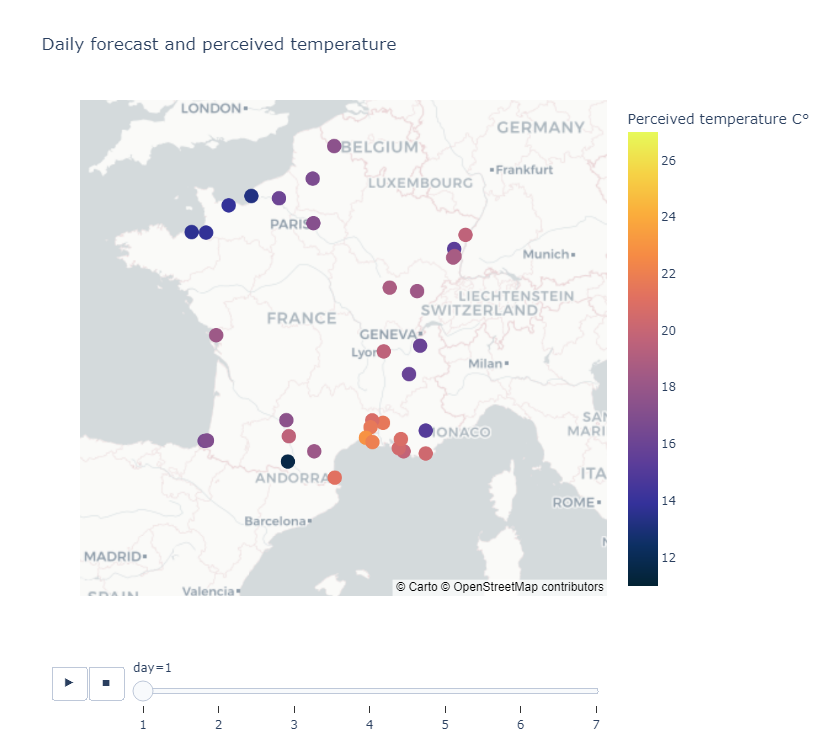

In [69]:
max_temp = wd['pt'].max()
min_temp = wd['pt'].min()

fig = px.scatter_mapbox(wd, lat = 'latitude', lon = 'longitude',  animation_frame = 'day',
                        color='pt', hover_name = 'location', hover_data= {
                            "pt": True,   
                            "weather": True,
                            "latitude": False,
                            "longitude": False,
                        },
                        custom_data=['pt','weather','day'],
                        mapbox_style="carto-positron",
                        size_max=30,
                        labels = {'pt': 'Perceived temperature C°'},
                        color_continuous_scale="thermal", range_color=[min_temp,max_temp],
                        title='Daily forecast and perceived temperature',
                        width = 750, height=750, zoom=4.3)

fig.update_traces(marker={'size': 15})
fig.update_traces(hovertemplate='Day: %{customdata[2]}<br>Perceived temperature °C: %{customdata[0]} <br>Forecast: %{customdata[1]}')
for frame in fig.frames:
    frame.data[0].hovertemplate ='Day: %{customdata[2]}<br>Perceived temperature °C: %{customdata[0]} <br>Forecast: %{customdata[1]}'
fig.show()

pio.write_html(fig, "daily_forecast.html")

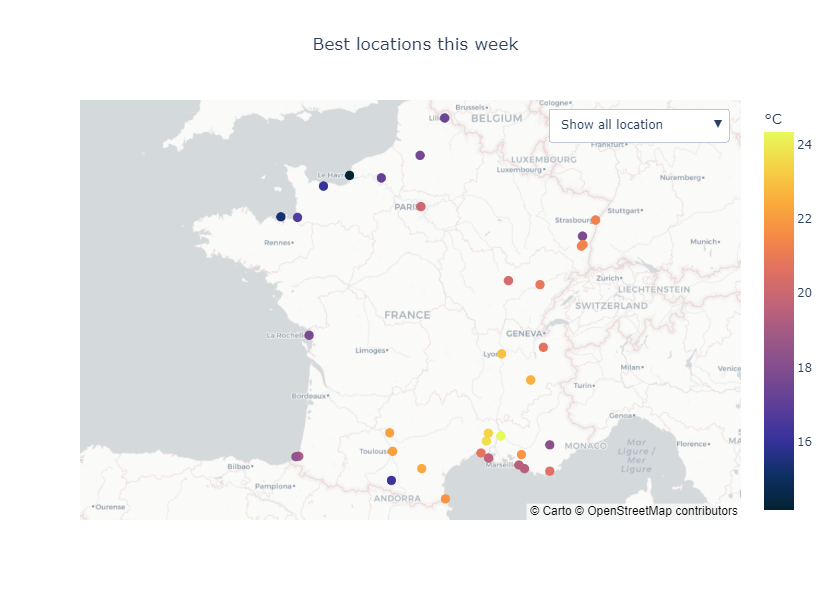

In [72]:
fig = go.Figure()

fig.update_layout(
        mapbox = {'style': "carto-positron"})

fig.add_trace(
    go.Scattermapbox(
        lat = coord_weather['latitude'], 
        lon = coord_weather['longitude'],
        mode="markers",
        marker={"size": 10, 
                'color' : coord_weather['pt'], 
                'colorscale':'thermal',
                'showscale':True,
                'colorbar': dict(
                title='°C')
               },
        text=[f"{coord_weather['location'][i]}<br>Perceived temperature {str(coord_weather['pt'][i])} C°<br>Forecast: {coord_weather['weather'][i]}" for i in range(coord_weather.shape[0])],
        hoverinfo='text'
        
    ))
best_five = coord_weather.loc[coord_weather['top_location']==1,:]

fig.add_trace(
    go.Scattermapbox(
        lat = best_five['latitude'], 
        lon = best_five['longitude'],
        mode="markers",
        marker={"size": 10, 
                'color' : best_five['pt'], 
                'colorscale':'thermal',
                'showscale':True,
                'colorbar': dict(
                title='°C')
               },
        text=[f"{best_five['location'][i]}<br>Perceived temperature {str(best_five['pt'][i])} C°<br>Forecast: {best_five['weather'][i]}" for i in best_five.index],
        hoverinfo='text',
        visible=False
    )
)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        x = 0.98,
        y=0.98,
        direction = 'down',
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Show all location",
                        method = "update",
                        args = [{"visible" : [True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Show top five locations",
                            method = "update",
                            args = [{"visible" : [False, True]}])
                            ]
    )]
)

fig.update_layout(
        title = go.layout.Title(text = "Best locations this week", x = 0.5),
        showlegend = False,
        width= 800,
        height=600,
        mapbox=dict(
        bearing=0,
        center={'lat':46.7,'lon':2},
        pitch=0,
        zoom=4.5
    ))

pio.write_html(fig, "best_locations.html")
fig.show()

In [47]:
#buttons generator
buttons = []
for i in range(0,coord.shape[0]):
    loc_name = coord.sort_values('location')['location'][i]
    loc_lat = coord.sort_values('location')['latitude'][i]
    loc_lon = coord.sort_values('location')['longitude'][i]
    buttons.append(go.layout.updatemenu.Button(
                        label = loc_name,
                        method = "relayout",
                        args = [{'mapbox.center.lat': loc_lat, 
                                 'mapbox.center.lon': loc_lon,
                                 'mapbox.zoom': 11}]))    

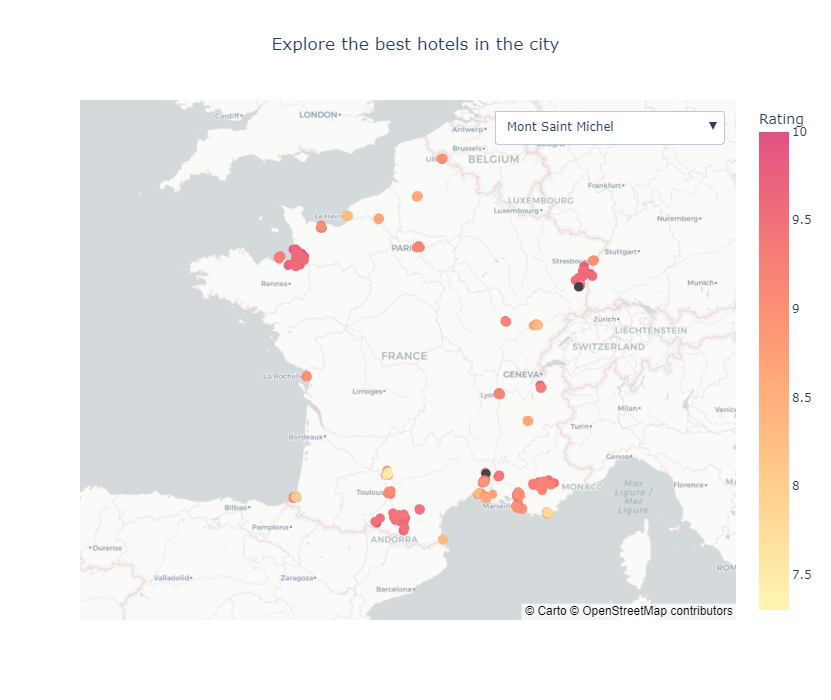

In [73]:
fig = go.Figure()

fig.update_layout(
        mapbox = {'style': "carto-positron"})

fig.add_trace(
    go.Scattermapbox(
        lat = top_20_hotels['latitude'], 
        lon = top_20_hotels['longitude'],
        mode="markers",
        marker= {"size": 10, 
                 'color' :top_20_hotels['score'], 
                 'colorscale':'pinkyl',
                 'showscale':True,
                 'colorbar': dict(
                title='Rating')},
        text=[f"{top_20_hotels['name'][i]}<br>{str(top_20_hotels['stars'][i])} stars<br>Rating: {top_20_hotels['score'][i]}" for i in top_20_hotels.index],
        hoverinfo='text',
    ))

fig.update_layout(
        title = go.layout.Title(text = "Explore the best hotels in the city", x = 0.5),
        showlegend = False,
        width= 800,
        height=700,
        mapbox=dict(
        bearing=0,
        center={'lat':46.5,'lon':2},
        pitch=0,
        zoom=4.5
    ))


fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        x = 0.98,
        y=0.98,
        direction = 'down',
        
        buttons = [go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 48.6359541, 
                                                        'mapbox.center.lon': -1.511459954959514, 
                                                        'mapbox.zoom': 9}],
                                              'label': 'Mont Saint Michel',
                                              'method': 'relayout'}),
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 48.649518, 
                                                        'mapbox.center.lon': -2.0260409, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'St Malo',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 49.2764624, 
                                                        'mapbox.center.lon': -0.7024738, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Bayeux',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 49.4938975, 
                                                        'mapbox.center.lon': 0.1079732, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Le Havre',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 49.4404591, 
                                                        'mapbox.center.lon': 1.0939658, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Rouen',
                                              'method': 'relayout'}),
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 48.8588897, 
                                                        'mapbox.center.lon': 2.3200410217200766, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'Paris',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 49.8941708, 
                                                        'mapbox.center.lon': 2.2956951, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Amiens',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 50.6365654, 
                                                        'mapbox.center.lon': 3.0635282, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Lille',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 48.584614, 
                                                        'mapbox.center.lon': 7.7507127, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Strasbourg',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 48.249489800000006, 
                                                        'mapbox.center.lon': 7.34429620253195, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'Chateau du Haut Koenigsbourg',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 48.0777517, 
                                                        'mapbox.center.lon': 7.3579641, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Colmar',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 48.0447968, 
                                                        'mapbox.center.lon': 7.3079618, 
                                                        'mapbox.zoom': 14}],
                                              'label': 'Eguisheim',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 47.2380222, 
                                                        'mapbox.center.lon': 6.0243622, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Besancon',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 47.3215806, 
                                                        'mapbox.center.lon': 5.0414701, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Dijon',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 45.8992348, 
                                                        'mapbox.center.lon': 6.1288847, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Annecy',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 45.1875602, 
                                                        'mapbox.center.lon': 5.7357819, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Grenoble',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 45.7578137, 
                                                        'mapbox.center.lon': 4.8320114, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Lyon',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.7496562, 
                                                        'mapbox.center.lon': 6.3285616, 
                                                        'mapbox.zoom': 8}],
                                              'label': 'Gorges du Verdon',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.1572172, 
                                                        'mapbox.center.lon': 6.329253867921363, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Bormes les Mimosas',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.2140359, 
                                                        'mapbox.center.lon': 5.5396318, 
                                                        'mapbox.zoom': 14}],
                                              'label': 'Cassis', 
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.2961743, 
                                                        'mapbox.center.lon': 5.3699525, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'Marseille',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.5298424, 
                                                        'mapbox.center.lon': 5.4474738, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'Aix en Provence',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.9492493, 
                                                        'mapbox.center.lon': 4.8059012, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Avignon',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 44.0121279, 
                                                        'mapbox.center.lon': 4.4196718, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Uzes',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.8374249, 
                                                        'mapbox.center.lon': 4.3600687, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'Nimes',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.5658225, 
                                                        'mapbox.center.lon': 4.1912837, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Aigues Mortes',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.4522771, 
                                                        'mapbox.center.lon': 4.4287172, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'Saintes Maries de la mer',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 42.52505, 
                                                        'mapbox.center.lon': 3.0831554, 
                                                        'mapbox.zoom': 15}],
                                              'label': 'Collioure',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.2130358, 
                                                        'mapbox.center.lon': 2.3491069, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Carcassonne',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 42.9455368, 
                                                        'mapbox.center.lon': 1.4065544156065486, 
                                                        'mapbox.zoom': 8}],
                                              'label': 'Ariege',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.6044622, 
                                                        'mapbox.center.lon': 1.4442469, 
                                                        'mapbox.zoom': 11}],
                                              'label': 'Toulouse',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 44.0175835, 
                                                        'mapbox.center.lon': 1.3549991, 
                                                        'mapbox.zoom': 12}],
                                              'label': 'Montauban',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.4832523, 
                                                        'mapbox.center.lon': -1.5592776, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Biarritz',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 43.4933379, 
                                                        'mapbox.center.lon': -1.475099, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'Bayonne',
                                              'method': 'relayout'}), 
                    go.layout.updatemenu.Button({'args': [{'mapbox.center.lat': 46.1591126, 
                                                        'mapbox.center.lon': -1.1520434, 
                                                        'mapbox.zoom': 13}],
                                              'label': 'La Rochelle','method': 'relayout'})]
    )]
)

fig.show()
pio.write_html(fig, "best_hotels.html")

## Part IV: Creating a database

Create your data lake using S3 and store the extracted data as csv files.

In [ ]:
!pip install Boto3 -q

In [ ]:
import boto3

In [ ]:
session = boto3.Session(aws_access_key_id="AKIA4E2PTEJ4MOPH3XP", 
                        aws_secret_access_key="5Ki5/tyJWE9Uxm/tNKKIvdDdT1o7ai9r4hbcdy62")

In [ ]:
s3 = session.resource("s3")

In [ ]:
bucket = s3.create_bucket(Bucket="Kayak_Prokect")

In [ ]:
put_object = bucket.put_object(Key="hotel_data.csv", Body=csv)
put_object = bucket.put_object(Key="average_pt.csv", Body=csv)
#put_object = bucket.put_object(Key="raw_weather_data.csv", Body=csv)

- create a SQL Database using AWS RDS
- extract your data from S3
- store it in your newly created DB